# Cleaning and Graphing 'fao_data_land_data.csv'

### Importing Modules and Data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
land=pd.read_csv('fao_data_land_data.csv')
land

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,11,Area,2007.0,1000 Ha,38661.0,Q,agricultural_area
1,Afghanistan,11,Area,2006.0,1000 Ha,38659.0,Fm,agricultural_area
2,Afghanistan,11,Area,2005.0,1000 Ha,38515.0,Fm,agricultural_area
3,Afghanistan,11,Area,2004.0,1000 Ha,38064.0,Fm,agricultural_area
4,Afghanistan,11,Area,2003.0,1000 Ha,38899.0,Fm,agricultural_area
...,...,...,...,...,...,...,...,...
104779,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104780,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,Official data reported on FAO Questionnaires f...,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,Manual Estimation,NaN,NaN,NaN,NaN,NaN,total_area_equipped_for_irrigation


### Cleaning the Data

I first cut down the columns to what I need for graphing.

In [31]:
cols_to_use=['country_or_area', 'year','value', 'category']
land=pd.read_csv('fao_data_land_data.csv', usecols=cols_to_use)
land

,country_or_area,year,value,category
0,Afghanistan,2007.0,38661.0,agricultural_area
1,Afghanistan,2006.0,38659.0,agricultural_area
2,Afghanistan,2005.0,38515.0,agricultural_area
3,Afghanistan,2004.0,38064.0,agricultural_area
4,Afghanistan,2003.0,38899.0,agricultural_area
...,...,...,...,...
104779,A,NaN,NaN,total_area_equipped_for_irrigation
104780,F,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,NaN,NaN,total_area_equipped_for_irrigation


I then identify and drop unnecessary rows at the bottom of the dataframe.

In [32]:
land.tail(10)

,country_or_area,year,value,category
104774,Zimbabwe,1962.0,23.0,total_area_equipped_for_irrigation
104775,Zimbabwe,1961.0,22.0,total_area_equipped_for_irrigation
104776,fnSeqID,NaN,NaN,total_area_equipped_for_irrigation
104777,W,NaN,NaN,total_area_equipped_for_irrigation
104778,E,NaN,NaN,total_area_equipped_for_irrigation
104779,A,NaN,NaN,total_area_equipped_for_irrigation
104780,F,NaN,NaN,total_area_equipped_for_irrigation
104781,Q,NaN,NaN,total_area_equipped_for_irrigation
104782,Fm,NaN,NaN,total_area_equipped_for_irrigation
104783,I,NaN,NaN,total_area_equipped_for_irrigation


In [33]:
land=land.drop(labels=range(104776,104784), axis=0, inplace=False)

In [34]:
land.tail(10)

,country_or_area,year,value,category
104766,Zimbabwe,1970.0,46.0,total_area_equipped_for_irrigation
104767,Zimbabwe,1969.0,46.0,total_area_equipped_for_irrigation
104768,Zimbabwe,1968.0,46.0,total_area_equipped_for_irrigation
104769,Zimbabwe,1967.0,46.0,total_area_equipped_for_irrigation
104770,Zimbabwe,1966.0,34.0,total_area_equipped_for_irrigation
104771,Zimbabwe,1965.0,34.0,total_area_equipped_for_irrigation
104772,Zimbabwe,1964.0,32.0,total_area_equipped_for_irrigation
104773,Zimbabwe,1963.0,23.0,total_area_equipped_for_irrigation
104774,Zimbabwe,1962.0,23.0,total_area_equipped_for_irrigation
104775,Zimbabwe,1961.0,22.0,total_area_equipped_for_irrigation


Changing the column names to something more clear and easier to type.

In [35]:
land.columns=['Region', 'Year', 'Area', 'Category']
land.head()

,Region,Year,Area,Category
0,Afghanistan,2007.0,38661.0,agricultural_area
1,Afghanistan,2006.0,38659.0,agricultural_area
2,Afghanistan,2005.0,38515.0,agricultural_area
3,Afghanistan,2004.0,38064.0,agricultural_area
4,Afghanistan,2003.0,38899.0,agricultural_area


Here I am checking the data for NaNs and empty cells.

In [36]:
land.replace('?', np.nan, inplace=True)
no_data=land.isnull()

for column in no_data.columns.values.tolist():
    print(column)
    print(no_data[column].value_counts())
    print('')

Region
False    104776
Name: Region, dtype: int64

Year
False    104659
True        117
Name: Year, dtype: int64

Area
False    104659
True        117
Name: Area, dtype: int64

Category
False    104776
Name: Category, dtype: int64



And finally dropping the NaNs.

In [37]:
land.dropna(inplace=True)

In [38]:
land.dtypes

Region       object
Year        float64
Area        float64
Category     object
dtype: object

Here, I flip the 'Year' column from a float, to an int, to an object to get rid of the .0s .

In [39]:
land['Year']=land['Year'].astype('int')
land.dtypes

Region       object
Year          int32
Area        float64
Category     object
dtype: object

In [61]:
land['Year']=land['Year'].astype('object')

In [41]:
land.head()

,Region,Year,Area,Category
0,Afghanistan,2007,38661.0,agricultural_area
1,Afghanistan,2006,38659.0,agricultural_area
2,Afghanistan,2005,38515.0,agricultural_area
3,Afghanistan,2004,38064.0,agricultural_area
4,Afghanistan,2003,38899.0,agricultural_area


In [59]:
land['Area']=land['Area'].astype('int')
land.dtypes

Region      object
Year        object
Area         int32
Category    object
dtype: object

In [43]:
land.head()

,Region,Year,Area,Category
0,Afghanistan,2007,38661,agricultural_area
1,Afghanistan,2006,38659,agricultural_area
2,Afghanistan,2005,38515,agricultural_area
3,Afghanistan,2004,38064,agricultural_area
4,Afghanistan,2003,38899,agricultural_area


### Preparing for Graphing

I only want to graph the increasing area of farmland, so I drop the 'Category' column.

In [44]:
land_area=land.drop(axis=1, columns='Category')
land_area.head()

,Region,Year,Area
0,Afghanistan,2007,38661
1,Afghanistan,2006,38659
2,Afghanistan,2005,38515
3,Afghanistan,2004,38064
4,Afghanistan,2003,38899


And I pivot the table to cut down on repeating values.

In [45]:
land_area2=pd.pivot_table(land_area, index='Year', columns='Region', values='Area', fill_value=0)
land_area2

Region,Afghanistan,Africa +,Albania,Algeria,American Samoa,Americas +,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Wallis and Futuna Islands,Western Africa +,Western Asia +,Western Europe +,Western Sahara,World +,Yemen,Yugoslav SFR,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1961,26990.750000,927526.222222,983.222222,71823.125000,8.666667,1.180163e+06,24.5,45865.625,0.0,19.333333,...,6.666667,196224.888889,146524.555556,43252.666667,15800.000000,4.146173e+06,19226.500000,9954.111111,22047.111111,11347.666667
1962,27013.250000,927657.000000,985.444444,71659.750000,8.666667,1.180568e+06,24.5,45876.875,0.0,18.833333,...,6.666667,196341.777778,146632.888889,43220.111111,15800.000000,4.149369e+06,19231.500000,9934.222222,22059.222222,11372.222222
1963,27032.000000,928080.888889,987.888889,71551.125000,8.666667,1.181814e+06,24.5,45884.375,0.0,19.333333,...,6.666667,196423.000000,146948.000000,43168.444444,15800.000000,4.152637e+06,19236.625000,9910.444444,22069.333333,11396.666667
1964,27055.625000,928313.333333,989.222222,71457.625000,8.666667,1.182427e+06,24.5,45895.625,0.0,18.833333,...,6.666667,196508.222222,146903.000000,43077.777778,15800.000000,4.155457e+06,19241.250000,9910.666667,22082.666667,11422.111111
1965,27056.375000,928717.111111,994.555556,71462.375000,8.666667,1.182717e+06,24.5,45903.125,0.0,19.666667,...,6.666667,196625.222222,146826.555556,43038.777778,15800.000000,4.159057e+06,19245.625000,9901.777778,22100.444444,11440.111111
1966,27070.625000,929549.333333,998.555556,71462.500000,8.666667,1.183704e+06,24.5,45914.375,0.0,19.666667,...,6.666667,196663.444444,146726.777778,42950.222222,15800.000000,4.162081e+06,19250.625000,9889.222222,22116.111111,11471.222222
1967,27096.125000,929911.777778,1002.333333,71493.875000,8.666667,1.184598e+06,24.5,45925.625,0.0,19.166667,...,6.666667,196777.444444,146717.555556,42816.111111,15800.000000,4.165564e+06,19253.875000,9881.666667,22131.777778,11497.000000
1968,27096.500000,930533.777778,1005.000000,71472.125000,8.666667,1.187185e+06,24.5,45936.875,0.0,19.166667,...,6.666667,197074.111111,146773.111111,42626.333333,15800.000000,4.169571e+06,19256.625000,9874.666667,22147.444444,11521.444444
1969,27102.500000,931098.333333,1007.222222,71472.250000,8.666667,1.190515e+06,24.5,45951.875,0.0,19.666667,...,6.666667,197191.000000,147182.222222,42606.333333,10533.833333,4.176544e+06,19261.000000,9870.222222,22163.222222,11545.888889


That dataframe is too large to scan through for the regions I want to graph, so I pull up a list of them using pd.unique

In [46]:
pd.unique(land['Region'])

array(['Afghanistan', 'Africa +', 'Albania', 'Algeria', 'American Samoa',
       'Americas +', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia +', 'Australia',
       'Australia and New Zealand +', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Caribbean +', 'Cayman Islands',
       'Central African Republic', 'Central America +', 'Central Asia +',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo', 'Congo, Democratic Republic of', 'Cook Islands',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Czechoslovakia', 'Denmark', 

In [47]:
len(pd.unique(land['Region']))

269

The creator of this dataset was kind enough to mark the regions with a '+' to separate them from the individual countries. I use a function to drop all but the columns that have a '+' in it.

In [48]:
region_drop=[col for col in land_area2.columns if '+' not in col]
la3=land_area2.drop(region_drop, axis=1)
la3.head()

Region,Africa +,Americas +,Asia +,Australia and New Zealand +,Caribbean +,Central America +,Central Asia +,Eastern Africa +,Eastern Asia +,Eastern Europe +,...,Small Island Developing States +,South America +,South-Eastern Asia +,Southern Africa +,Southern Asia +,Southern Europe +,Western Africa +,Western Asia +,Western Europe +,World +
Year,,,,,,,,,,,,,,,,,,,,,
1961,927526.222222,1.180163e+06,911930.555556,287884.777778,7770.333333,83709.444444,0.0,209089.666667,388203.888889,682830.888889,...,31474.888889,502466.333333,127064.000000,99028.777778,250138.111111,54122.444444,196224.888889,146524.555556,43252.666667,4.146173e+06
1962,927657.000000,1.180568e+06,913559.333333,288589.444444,7838.777778,83707.111111,0.0,209360.444444,388864.222222,683213.444444,...,31545.777778,503954.444444,127249.666667,98770.444444,250812.555556,54127.222222,196341.777778,146632.888889,43220.111111,4.149369e+06
1963,928080.888889,1.181814e+06,914962.222222,289320.888889,7913.888889,83710.222222,0.0,209868.777778,389519.000000,682836.000000,...,31625.000000,505403.444444,127471.333333,98520.222222,251023.888889,54092.666667,196423.000000,146948.000000,43168.444444,4.152637e+06
1964,928313.333333,1.182427e+06,916675.333333,290161.333333,8094.666667,83720.333333,0.0,210138.888889,390296.666667,682501.555556,...,31810.777778,506533.333333,127706.111111,98251.888889,251769.555556,53959.888889,196508.222222,146903.000000,43077.777778,4.155457e+06
1965,928717.111111,1.182717e+06,918125.555556,291217.888889,8042.555556,83732.666667,0.0,210393.555556,391262.777778,683096.444444,...,31763.555556,507664.888889,127788.111111,98005.777778,252248.111111,53878.333333,196625.222222,146826.555556,43038.777778,4.159057e+06


In [49]:
print(la3.columns.tolist())

['Africa +', 'Americas +', 'Asia +', 'Australia and New Zealand +', 'Caribbean +', 'Central America +', 'Central Asia +', 'Eastern Africa +', 'Eastern Asia +', 'Eastern Europe +', 'Europe +', 'European Union +', 'LandLocked developing countries +', 'Least Developed Countries +', 'Low Income Food Deficit Countries +', 'Melanesia +', 'Micronesia +', 'Middle Africa +', 'Net Food Importing Developing Countries +', 'Northern Africa +', 'Northern America +', 'Northern Europe +', 'Oceania +', 'Polynesia +', 'Small Island Developing States +', 'South America +', 'South-Eastern Asia +', 'Southern Africa +', 'Southern Asia +', 'Southern Europe +', 'Western Africa +', 'Western Asia +', 'Western Europe +', 'World +']


Here, I pick out the columns I want to graph to coincide with my other dataset. I also remove the '+' from the column names.

In [50]:
la3=la3[['Africa +', 'Asia +', 'Europe +', 'Northern America +', 'South America +', 'World +']]
headers=['Africa', 'Asia', 'Europe', 'North America', 'South America', 'World']
la3.columns=headers
la3.head()

,Africa,Asia,Europe,North America,South America,World
Year,,,,,,
1961,927526.222222,911930.555556,825966.444444,586216.444444,502466.333333,4.146173e+06
1962,927657.000000,913559.333333,826292.888889,585067.666667,503954.444444,4.149369e+06
1963,928080.888889,914962.222222,825754.111111,584786.000000,505403.444444,4.152637e+06
1964,928313.333333,916675.333333,825170.777778,584079.000000,506533.333333,4.155457e+06
1965,928717.111111,918125.555556,825569.555556,583276.444444,507664.888889,4.159057e+06


In [60]:
la3.to_excel('fao_land_data_spread.xlsx')

### Graphing the Data

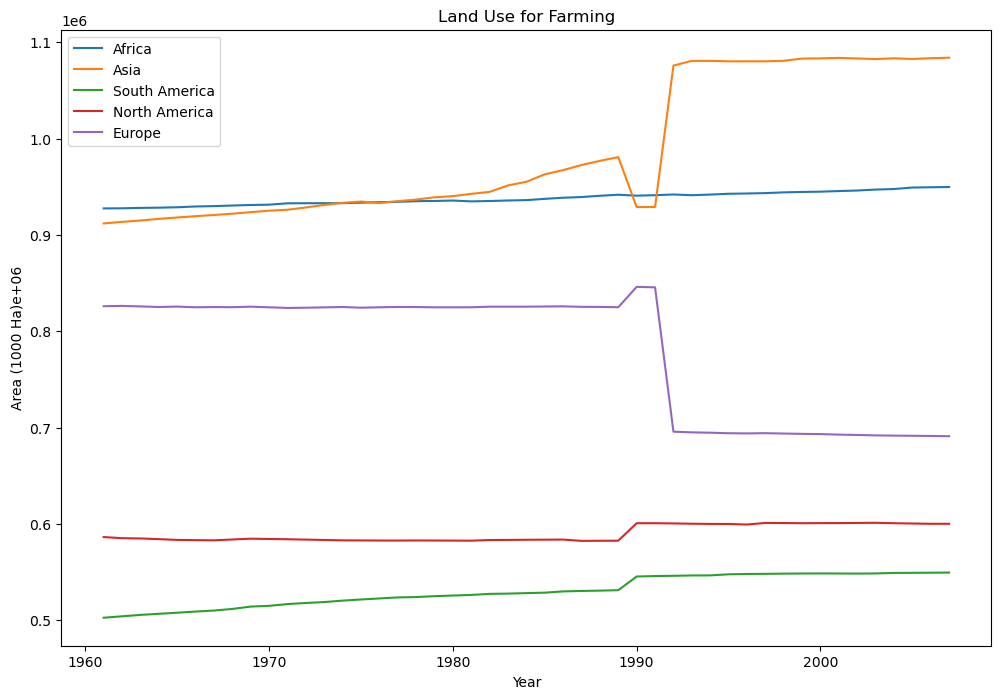

In [54]:
plt.figure(figsize=(12, 8))
plt.title('Land Use for Farming')
plt.xlabel('Year')
plt.ylabel('Area (1000 Ha)e+06')
plt.plot(la3['Africa'])
plt.plot(la3['Asia'])
plt.plot(la3['South America'])
plt.plot(la3['North America'])
plt.plot(la3['Europe'])
plt.legend(['Africa', 'Asia', 'South America', 'North America', 'Europe'])

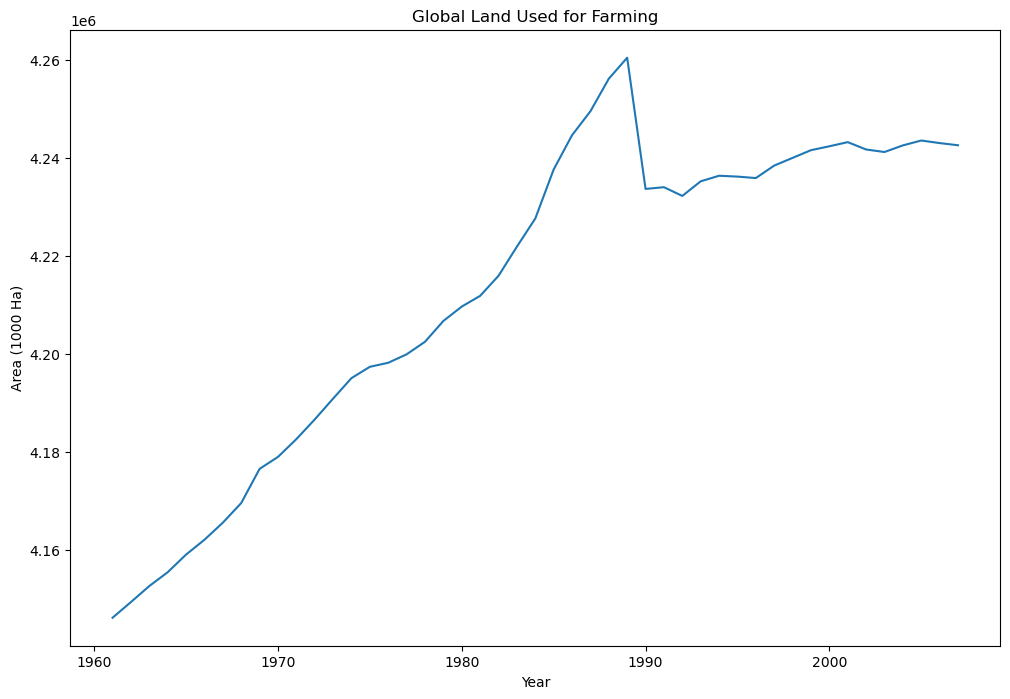

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Global Land Used for Farming')
plt.xlabel('Year')
plt.ylabel('Area (1000 Ha)')
plt.plot(la3['World'])